**Install and Import Libraries**

In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


Required libraries are installed and imported. The yfinance library is used to download stock data from Yahoo Finance. Pandas and NumPy are used for data handling and processing. Matplotlib is used for visualization. Scikit-learn libraries are used to split the dataset, train the Linear Regression model, and evaluate its performance

**Stock Data of Apple from Yahoo Finance**

In [ ]:
stock = 'AAPL'
df = yf.download(stock, start='2022-01-01', end='2026-01-01')

df.head()


/tmp/ipython-input-3579643642.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start='2022-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.270325,179.122459,174.058687,174.176216,104487900
2022-01-04,176.007797,179.181232,175.439712,178.877604,99310400
2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600
2022-01-06,168.466003,171.698203,168.113400,169.151618,96904000
2022-01-07,168.632477,170.562001,167.515901,169.337684,86709100


Historical stock data of Apple (AAPL) is downloaded using the yfinance library.The data includes daily Open, High, Low, Close, and Volume values. This dataset will be used to train the machine learning model to predict future prices

**Next Day's Close Price**

In [ ]:
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

New column called Next_Close is created by shifting the Close column one day upward. This means we are using today’s data to predict tomorrow’s closing price. Any missing values created due to shifting are removed from the dataset

**Features and Target**

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']


Input features are selected as Open, High, Low, and Volume. The target variable is the Next_Close price. These features are used by the model to learn patterns and make predictions about the next day’s closing price

**Train and Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

Dataset is divided into training and testing sets. 80 percent of the data is used to train the model and 20 percent is used to test it. Shuffling is set to False because stock market data follows a time sequence and should remain in order

**Train Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Linear Regression model is created and trained using the training data. The model learns the relationship between the input features and the next day’s closing price

**Prediction**

In [ ]:
y_pred = model.predict(X_test)

Trained model is used to predict the next day’s closing prices using the test dataset. These predicted values will be compared with the actual values to evaluate performance

**Plot (Actual and Predicted closing price)**

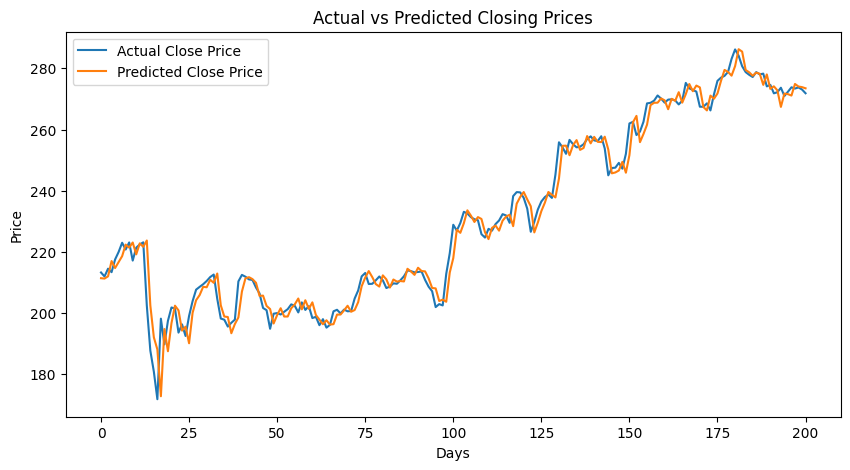

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

Graph is plotted to compare the actual closing prices with the predicted closing prices

**Model Evaluation**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.052138137024578


Mean Absolute Error (MAE) is calculated to measure the model’s performance. MAE shows the average difference between the actual and predicted prices